In [66]:
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os, shutil
from PIL import Image, ImageDraw, ImageFont, ImageColor
import random
import json

In [67]:
original_dataset_dir ='\\Users\\danie\\Penn_State_REU_Jupyter\\Hexagon ML Project\\Training_set_6_9' 

# base_dir='\\Users\\danie\\Penn_State_REU_Jupyter\\Hexagon ML Project\\Training_base'
# train_dir = os.path.join(base_dir, 'train')                                
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')                      
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')                                  
# os.mkdir(test_dir)



In [68]:

#Loads labels and training data into two arrays, such that their indicies match
train_targets1=[]
with open("Training_set_6_9\\training_labels.json",'r') as dict_contents:
    train_targets_dict=json.load(dict_contents)

train_images1 = []
path = original_dataset_dir
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    #print(f[10:-4])
    train_images1.append(Image.open(os.path.join(path,f)))
    train_targets1.append(train_targets_dict[str(f[10:-4])])


[[13.5, 18.186533479473212],
 [[-7.0, 0.0], [3.5, 6.0621778264910695], [3.5, -6.0621778264910695]]]

In [91]:
#index_list=random.sample(range(len(train_images)),len(train_images))
index_list=[12, 77, 11, 32, 35, 28, 58, 70, 0, 46, 64, 74, 13, 1, 19, 2, 57, 39, 56, 30, 71, 49, 38, 7, 47, 75, 43, 25, 5, 44, 18, 50, 51, 17, 21, 27, 48, 29, 6, 10, 8, 34, 76, 9, 69, 60, 62, 15, 65, 53, 59, 16, 24, 4, 55, 22, 63, 78, 73, 67, 20, 42, 68, 52, 26, 79, 36, 33, 45, 41, 37, 72, 14, 40, 66, 3, 54, 31, 61, 23]
train_images=[]
train_targets=[]
for i in index_list:
    train_images.append(train_images1[i])
    train_targets.append(train_targets1[i])


12
77
11
32
35
28
58
70
0
46
64
74
13
1
19
2
57
39
56
30
71
49
38
7
47
75
43
25
5
44
18
50
51
17
21
27
48
29
6
10
8
34
76
9
69
60
62
15
65
53
59
16
24
4
55
22
63
78
73
67
20
42
68
52
26
79
36
33
45
41
37
72
14
40
66
3
54
31
61
23


In [88]:
print(train_images[0:20])

[]


(-0.5, 31.5, 31.5, -0.5)

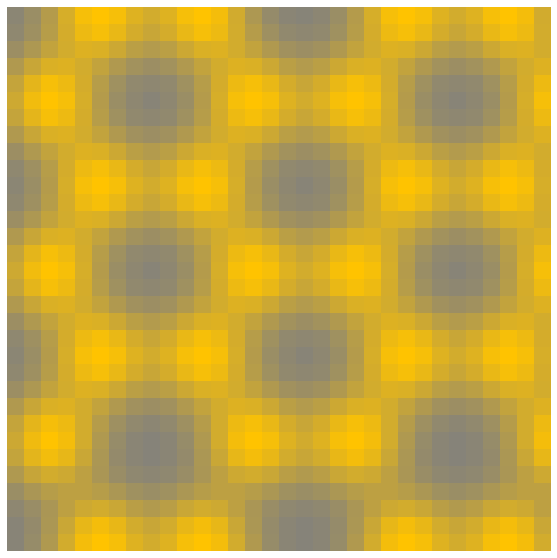

In [92]:
fig = plt.figure(figsize = (10, 10))
ax = plt.subplot(1,1,1)
ax.imshow(train_images1[3])
ax.axis('off')

In [86]:
def build_model():
    model = models.Sequential()                                  
    model.add(layers.Conv2D(32,(6,6), activation='relu',
                           input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((6,6)))
    model.add(layers.Conv2D(64,(6,6), activation='relu'))
    model.add(layers.MaxPooling2D((6,6)))
    model.add(layers.Conv2D(128,(6,6), activation='relu'))
    model.add(layers.MaxPooling2D((6,6)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(8))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
k = 4
num_val_samples = len(train_images) // k
num_epochs = 20
all_histories = []
train_datagen = ImageDataGenerator(rescale=1./255)             
val_datagen = ImageDataGenerator(rescale=1./255) 
for i in range(k):
    print('processing fold #', i)
    val_images = train_images[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_images = train_images[:i * num_val_samples] + train_images[(i + 1) * num_val_samples:]
    partial_train_targets = train_targets[:i * num_val_samples] + train_targets[(i + 1) * num_val_samples:]
    
    train_generator= train_datagen.flow(
        partial_train_images,
        y=partial_train_targets,
        shuffle=True,
        batch_size=1)
    val_generator= val_datagen.flow(
        val_images,
        y=val_targets,
        shuffle=True,
        batch_size=1)

    model = build_model()                                                    
    history= model.fit_generator(
        train_generator,
        steps_per_epoch=len(partial_train_images),
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=num_val_samples)
    #mae_history = history.history['val_mean_absolute_error']
    all_histories.append(history)